In [1]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV 
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from datetime import datetime
start_time = datetime.now()

import warnings
warnings.simplefilter(action="ignore")

plt.rcParams.update({'figure.figsize':(12,8)})
plt.rcParams.update({'font.size':15})

In [2]:
vars = pd.read_csv('vars_final.csv')
vars

,card_zip3_total_7,Card_Merchnum_desc_max_60,Merchnum_total_1,Card_Merchnum_desc_total_60,Cardnum_total_7,Card_Merchdesc_max_60,Cardnum_avg_0,Card_Merchnum_desc_avg_60,card_zip_total_3,merch_zip_total_1,...,Card_Merchnum_desc_max_0,card_zip3_max_3,Card_Merchdesc_max_0,Card_Merchnum_desc_max_1,card_merch_avg_60,card_zip3_total_0,card_zip_max_0,card_merch_max_0,Recnum,Fraud
0,3.62,3.62,3.62,3.62,3.62,3.62,3.620,3.6200,3.62,3.62,...,3.62,3.62,3.62,3.62,3.6200,3.62,3.62,3.62,1,0
1,31.42,31.42,31.42,31.42,31.42,31.42,31.420,31.4200,31.42,31.42,...,31.42,31.42,31.42,31.42,31.4200,31.42,31.42,31.42,2,0
2,178.49,178.49,178.49,178.49,178.49,178.49,178.490,178.4900,178.49,178.49,...,178.49,178.49,178.49,178.49,178.4900,178.49,178.49,178.49,3,0
3,3.62,3.62,7.24,3.62,3.62,3.62,3.620,3.6200,3.62,7.24,...,3.62,3.62,3.62,3.62,3.6200,3.62,3.62,3.62,4,0
4,7.24,3.62,10.86,7.24,7.24,3.62,3.620,3.6200,7.24,10.86,...,3.62,3.62,3.62,3.62,3.6200,7.24,3.62,3.62,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96392,84.79,84.79,84.79,84.79,84.79,84.79,84.790,84.7900,84.79,84.79,...,84.79,84.79,84.79,84.79,84.7900,84.79,84.79,84.79,96749,0
96393,118.75,599.85,118.75,718.60,3140.25,599.85,401.875,359.3000,118.75,118.75,...,118.75,118.75,118.75,118.75,359.3000,118.75,118.75,118.75,96750,0
96394,363.56,363.56,5780.89,363.56,2578.13,363.56,363.560,363.5600,363.56,5780.89,...,363.56,363.56,363.56,363.56,363.5600,363.56,363.56,363.56,96751,0
96395,2202.03,2202.03,5721.23,3094.57,2202.03,2202.03,2202.030,773.6425,2202.03,5721.23,...,2202.03,2202.03,2202.03,2202.03,773.6425,2202.03,2202.03,2202.03,96752,0


In [3]:
numvars = 30
final_vars_list = ['Recnum','Fraud']
final_vars_list.extend(list(vars.columns[:numvars]))
vars = vars[final_vars_list]
vars.head()

,Recnum,Fraud,card_zip3_total_7,Card_Merchnum_desc_max_60,Merchnum_total_1,Card_Merchnum_desc_total_60,Cardnum_total_7,Card_Merchdesc_max_60,Cardnum_avg_0,Card_Merchnum_desc_avg_60,...,card_zip3_med_0,card_zip_max_1,Card_Merchnum_desc_max_0,card_zip3_max_3,Card_Merchdesc_max_0,Card_Merchnum_desc_max_1,card_merch_avg_60,card_zip3_total_0,card_zip_max_0,card_merch_max_0
0,1,0,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,...,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62
1,2,0,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,...,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42,31.42
2,3,0,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,...,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49,178.49
3,4,0,3.62,3.62,7.24,3.62,3.62,3.62,3.62,3.62,...,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62,3.62
4,5,0,7.24,3.62,10.86,7.24,7.24,3.62,3.62,3.62,...,3.62,3.62,3.62,3.62,3.62,3.62,3.62,7.24,3.62,3.62


In [4]:
vars.shape

(96397, 32)

In [5]:
vars['Fraud'].sum()

1059

In [6]:
vars['Fraud'].mean()

0.010985819060759152

In [7]:
record_save = vars['Recnum']
Y_save = vars[['Fraud']]

# Scale and truncate field values

In [8]:
X_no_scaling = vars.drop(columns = ['Recnum','Fraud'])
X_no_scaling.describe()

,card_zip3_total_7,Card_Merchnum_desc_max_60,Merchnum_total_1,Card_Merchnum_desc_total_60,Cardnum_total_7,Card_Merchdesc_max_60,Cardnum_avg_0,Card_Merchnum_desc_avg_60,card_zip_total_3,merch_zip_total_1,...,card_zip3_med_0,card_zip_max_1,Card_Merchnum_desc_max_0,card_zip3_max_3,Card_Merchdesc_max_0,Card_Merchnum_desc_max_1,card_merch_avg_60,card_zip3_total_0,card_zip_max_0,card_merch_max_0
count,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,...,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000
mean,766.708755,542.037643,1115.435988,1086.172428,2384.036098,552.096524,393.557490,404.444849,642.134217,1112.549193,...,392.655645,435.502009,420.780131,458.310179,421.189781,431.782889,404.508153,538.442185,422.732816,421.261258
std,4137.374620,1090.108775,4354.724591,4546.365935,7158.500841,1104.598654,726.845846,778.414021,4066.803407,4351.155279,...,787.600836,1012.066279,935.362747,1028.674796,935.848332,1009.776153,778.230197,2626.535168,936.565980,935.810708
min,0.010000,0.010000,0.010000,0.010000,0.140000,0.010000,0.010000,0.010000,0.010000,0.010000,...,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,77.150000,50.450000,116.270000,68.820000,292.400000,52.770000,42.835000,44.970000,58.350000,116.000000,...,35.000000,39.250000,36.000000,43.500000,36.140000,37.490000,44.920000,48.000000,37.420000,36.750000
50%,238.200000,216.970000,390.000000,277.670000,986.140000,224.300000,160.000000,171.000000,185.770000,389.550000,...,140.140000,153.360000,147.790000,168.000000,148.000000,150.000000,171.200000,164.490000,149.000000,147.980000
75%,693.560000,645.000000,1122.950000,933.000000,2566.000000,659.340000,453.900000,472.000000,556.940000,1120.350000,...,430.830000,470.020000,450.620000,500.000000,452.000000,464.500000,472.000000,500.000000,454.000000,450.940000
max,306633.410000,47900.000000,306633.410000,306633.410000,312616.060000,47900.000000,28392.840000,28392.840000,306633.410000,306633.410000,...,28392.840000,47900.000000,47900.000000,47900.000000,47900.000000,47900.000000,28392.840000,217467.180000,47900.000000,47900.000000


In [9]:
X = (X_no_scaling - X_no_scaling.mean()) / X_no_scaling.std()

In [10]:
# push in any outlier values
Clip = 10
cols = X.columns
X[cols] = X[cols].clip(-Clip, Clip)
X.describe()

,card_zip3_total_7,Card_Merchnum_desc_max_60,Merchnum_total_1,Card_Merchnum_desc_total_60,Cardnum_total_7,Card_Merchdesc_max_60,Cardnum_avg_0,Card_Merchnum_desc_avg_60,card_zip_total_3,merch_zip_total_1,...,card_zip3_med_0,card_zip_max_1,Card_Merchnum_desc_max_0,card_zip3_max_3,Card_Merchdesc_max_0,Card_Merchnum_desc_max_1,card_merch_avg_60,card_zip3_total_0,card_zip_max_0,card_merch_max_0
count,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,...,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000,96397.000000
mean,-0.012382,-0.011226,-0.011514,-0.010953,-0.014465,-0.011122,-0.006140,-0.008106,-0.012607,-0.011530,...,-0.007556,-0.011854,-0.010858,-0.011635,-0.010846,-0.011910,-0.008111,-0.011743,-0.010827,-0.010847
std,0.477940,0.783754,0.556079,0.606050,0.694553,0.789353,0.891892,0.847144,0.448265,0.554932,...,0.856687,0.753822,0.789402,0.762131,0.789739,0.752079,0.847032,0.485914,0.790265,0.789716
min,-0.185310,-0.497223,-0.256142,-0.238908,-0.333016,-0.499807,-0.541446,-0.519563,-0.157894,-0.255688,...,-0.498534,-0.430300,-0.449847,-0.445525,-0.450051,-0.427593,-0.519767,-0.204997,-0.451354,-0.450146
25%,-0.166666,-0.450953,-0.229444,-0.223773,-0.292189,-0.452043,-0.482527,-0.461804,-0.143549,-0.229031,...,-0.454108,-0.391528,-0.411370,-0.403247,-0.411445,-0.390476,-0.462059,-0.186726,-0.411410,-0.410886
50%,-0.127740,-0.298197,-0.166586,-0.177835,-0.195278,-0.296756,-0.321330,-0.299898,-0.112217,-0.166163,...,-0.320614,-0.278778,-0.291855,-0.282218,-0.291917,-0.279055,-0.299793,-0.142375,-0.292273,-0.292026
75%,-0.017680,0.094451,0.001725,-0.033691,0.025419,0.097088,0.083020,0.086786,-0.020949,0.001793,...,0.048469,0.034106,0.031902,0.040528,0.032922,0.032400,0.086725,-0.014636,0.033385,0.031714
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [11]:
# separate data into modeling (train/test) and out of time
oot_recnum = 84300
X_trntst = X[0:oot_recnum]
Y_trntst = Y_save[0:oot_recnum]
X_oot = X[oot_recnum:]
Y_oot = Y_save[oot_recnum:]

In [12]:
nitermax = 10
X_oot_orig = X_oot.copy()
pd.options.mode.chained_assignment = None  # default='warn'

In [13]:
Modeling_output = pd.DataFrame(columns=['Model','Trn','Tst','OOT'],index=range(1000))
counter = 0
model_counter = 0

# Logistic Regression

In [14]:
%%time

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = LogisticRegression(max_iter=10000, solver = 'liblinear', penalty = 'l2', C = 100)

 
    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    X_trn['predicted'] = model.predict_proba(X_trn_save)[:,1]
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted'] = predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    
    print(niter, FDR3.loc[niter, 'trn'], FDR3.loc[niter, 'tst'], FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['log reg', FDR3.loc[niter,'trn'], FDR3.loc[niter,'tst'], FDR3.loc[niter,'oot']]
    counter = counter + 1

print(round(FDR3.mean(),3))
model_counter = model_counter + 1

0 0.6943521594684385 0.6474820143884892 0.3463687150837989
1 0.6781045751633987 0.7126865671641791 0.3463687150837989
2 0.7 0.6428571428571429 0.3407821229050279
3 0.6919431279620853 0.6558704453441295 0.35195530726256985
4 0.7121212121212122 0.6083916083916084 0.3407821229050279
5 0.6624605678233438 0.7154471544715447 0.3407821229050279
6 0.6915584415584416 0.6628787878787878 0.3463687150837989
7 0.6935749588138386 0.6703296703296703 0.3407821229050279
8 0.680577849117175 0.6809338521400778 0.3743016759776536
9 0.6995153473344103 0.6666666666666666 0.3463687150837989
trn    0.690
tst    0.666
oot    0.347
dtype: float64
CPU times: user 11.9 s, sys: 51.1 ms, total: 11.9 s
Wall time: 2.92 s


# Decision Tree

In [41]:
%%time

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = DecisionTreeClassifier(max_depth=2)
 
    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['DT',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1

print(round(FDR3.mean(),3))
model_counter = model_counter + 1

0 0.4925619834710744 0.4909090909090909 0.26256983240223464
1 0.5086614173228347 0.5469387755102041 0.29608938547486036
2 0.5232 0.4745098039215686 0.2905027932960894
3 0.5544871794871795 0.43359375 0.29608938547486036
4 0.504950495049505 0.5364963503649635 0.29608938547486036
5 0.5150078988941548 0.4777327935222672 0.2905027932960894
6 0.5202020202020202 0.5034965034965035 0.29608938547486036
7 0.5107084019769358 0.5238095238095238 0.29608938547486036
8 0.4728434504792332 0.531496062992126 0.26256983240223464
9 0.5275974025974026 0.4810606060606061 0.2905027932960894
trn    0.513
tst    0.500
oot    0.288
dtype: float64
CPU times: user 1.51 s, sys: 7.89 ms, total: 1.51 s
Wall time: 1.5 s


In [42]:
plt.rcParams.update({'figure.figsize':(12,8)})
plt.rcParams.update({'font.size':100})

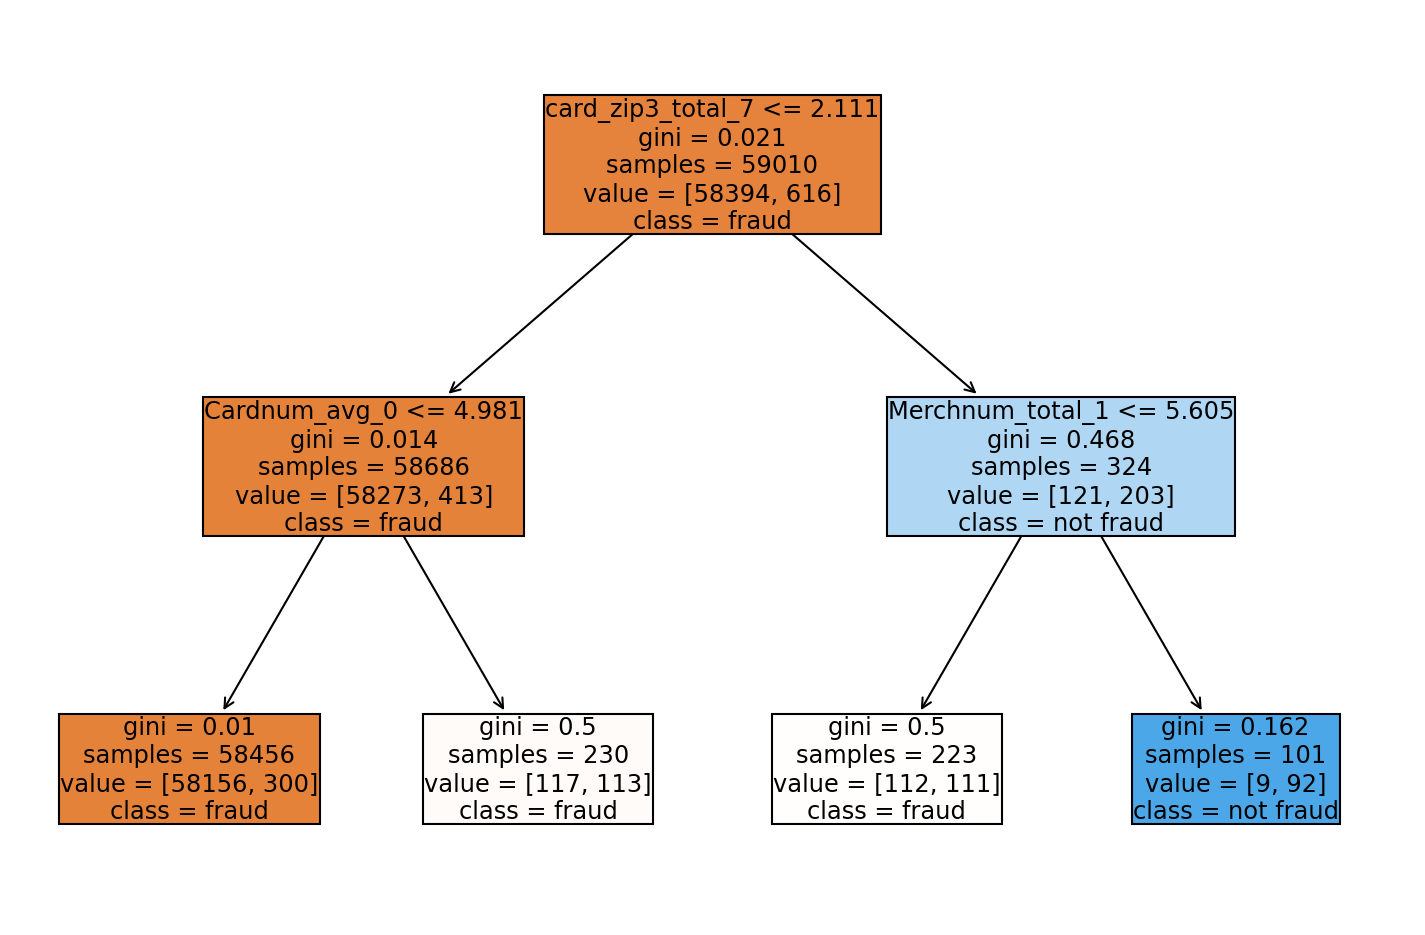

In [43]:
from sklearn import tree
fig = tree.plot_tree(model, feature_names=X_trn.columns,class_names=['fraud','not fraud'], filled=True)

# Random Forest

In [17]:
%%time

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = RandomForestClassifier(n_estimators=100,max_depth=20,min_samples_split=120,min_samples_leaf=120,max_features=10)
    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['RF',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    
print(round(FDR3.mean(),3))
model_counter = model_counter + 1

0 0.805 0.8107142857142857 0.547486033519553
1 0.819078947368421 0.7904411764705882 0.5642458100558659
2 0.810207336523126 0.8023715415019763 0.5027932960893855
3 0.8241935483870968 0.7769230769230769 0.5139664804469274
4 0.8183306055646481 0.7732342007434945 0.5586592178770949
5 0.8156606851549756 0.7902621722846442 0.547486033519553
6 0.8248407643312102 0.7579365079365079 0.3854748603351955
7 0.8113522537562604 0.8078291814946619 0.45251396648044695
8 0.8085808580858086 0.7737226277372263 0.5195530726256983
9 0.8231611893583725 0.7468879668049793 0.5418994413407822
trn    0.816
tst    0.783
oot    0.513
dtype: float64
CPU times: user 5min 24s, sys: 20.6 ms, total: 5min 24s
Wall time: 5min 24s


# LGBM

In [ ]:
%%time

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = lgb.LGBMClassifier(max_depth = 3,n_estimators = 100)

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['LGBM',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    
print(round(FDR3.mean(),3))
model_counter = model_counter + 1

0 0.899513776337115 0.7756653992395437 0.39106145251396646
1 0.9033280507131537 0.8192771084337349 0.4301675977653631
2 0.8941548183254344 0.8340080971659919 0.49162011173184356
3 0.8992 0.8117647058823529 0.5139664804469274
4 0.8852201257861635 0.8278688524590164 0.3128491620111732
5 0.8932038834951457 0.8091603053435115 0.3407821229050279
6 0.897822445561139 0.8056537102473498 0.43575418994413406
7 0.8949096880131363 0.8523985239852399 0.3743016759776536


# Neural Networks

In [74]:
%%time

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):  
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = MLPClassifier(hidden_layer_sizes=(10,10),learning_rate_init=.01)

#     model = MLPClassifier(hidden_layer_sizes=(10,10),alpha=.005,solver='adam',activation='relu',
#                           max_iter=1000,learning_rate='adaptive',learning_rate_init=.01)


    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['NN',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    
print(round(FDR3.mean(),3))
model_counter = model_counter + 1

0 0.8038585209003215 0.7364341085271318 0.46368715083798884
1 0.76 0.7686274509803922 0.3854748603351955
2 0.8 0.7272727272727273 0.5418994413407822
3 0.8069620253164557 0.782258064516129 0.39664804469273746
4 0.790893760539629 0.7560975609756098 0.5083798882681564
5 0.77491961414791 0.7713178294573644 0.3854748603351955
6 0.8052550231839258 0.7639484978540773 0.5083798882681564
7 0.8252100840336134 0.7719298245614035 0.5251396648044693
8 0.823051948051948 0.7348484848484849 0.4748603351955307
9 0.8260869565217391 0.7374517374517374 0.44692737430167595
trn    0.802
tst    0.755
oot    0.464
dtype: float64
CPU times: user 49.1 s, sys: 15.5 ms, total: 49.1 s
Wall time: 39.3 s


# GBC

In [33]:
%%time


FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):  
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = GradientBoostingClassifier(learning_rate=0.01,max_depth=4,n_estimators=300)

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['GBC',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    
print(FDR3.mean())
model_counter = model_counter + 1

0 0.7591973244147158 0.6985815602836879 0.5363128491620112
1 0.7545304777594728 0.717948717948718 0.5363128491620112
2 0.753968253968254 0.736 0.5307262569832403
3 0.7335526315789473 0.7316176470588235 0.5251396648044693
4 0.7577741407528642 0.7026022304832714 0.5307262569832403
5 0.7268445839874411 0.7448559670781894 0.5418994413407822
6 0.7479935794542536 0.7509727626459144 0.547486033519553
7 0.7838283828382838 0.6532846715328468 0.553072625698324
8 0.7515923566878981 0.7103174603174603 0.5363128491620112
9 0.7388535031847133 0.7579365079365079 0.5363128491620112
trn    0.750814
tst    0.720412
oot    0.537430
dtype: float64
CPU times: user 9min 36s, sys: 1.92 s, total: 9min 38s
Wall time: 9min 39s


# Catboost

In [34]:
%%time

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):  
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = CatBoostClassifier(verbose=0,
            iterations=100,
#             learning_rate=0.03,
#             l2_leaf_reg=5
    
    )
#

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['cat boost',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    
print(FDR3.mean())
model_counter = model_counter + 1

0 0.8746031746031746 0.816 0.553072625698324
1 0.865506329113924 0.8145161290322581 0.5418994413407822
2 0.8876582278481012 0.8064516129032258 0.5251396648044693
3 0.8682432432432432 0.8263888888888888 0.547486033519553
4 0.8741721854304636 0.8369565217391305 0.547486033519553
5 0.8578352180936996 0.8084291187739464 0.5754189944134078
6 0.8629690048939641 0.8014981273408239 0.5307262569832403
7 0.8621794871794872 0.78125 0.553072625698324
8 0.8817891373801917 0.8110236220472441 0.5698324022346368
9 0.8783333333333333 0.775 0.4972067039106145
trn    0.871329
tst    0.807751
oot    0.544134
dtype: float64


# XGBoost

In [16]:
%%time

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):  
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

#     model = XGBClassifier(
#         booster='gbtree',
#         max_depth=5, 
#         min_child_weight=75,
#         sub_sample=75,
#         gamma=0.01, 
#     )

    model = XGBClassifier(
        max_depth=2, 
        n_estimators=100,
        learning_rate=.01
    )

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['XGB',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    
print(round(FDR3.mean(),3))
model_counter = model_counter + 1

[22:37:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117781407/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0 0.6736 0.6588235294117647 0.2569832402234637
[22:37:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117781407/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1 0.687402799377916 0.6582278481012658 0.3743016759776536
[22:37:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117781407/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to '

# KNN

In [52]:
%%time

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):  
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = KNeighborsClassifier(n_neighbors=300) 
    
    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['Knn',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    
print(FDR3.mean())
model_counter = model_counter + 1

0 0.7611202635914333 0.7326007326007326 0.3743016759776536
1 0.7647058823529411 0.6940298507462687 0.3575418994413408
2 0.75 0.7276119402985075 0.3854748603351955
3 0.7442244224422442 0.7846715328467153 0.3743016759776536
4 0.7703583061889251 0.6992481203007519 0.4022346368715084
5 0.7664473684210527 0.6838235294117647 0.3463687150837989
6 0.7520128824476651 0.7413127413127413 0.35195530726256985
7 0.7375201288244766 0.7374517374517374 0.37988826815642457
8 0.752442996742671 0.7368421052631579 0.37988826815642457
9 0.7571669477234402 0.7491289198606271 0.3854748603351955
trn    0.755600
tst    0.728672
oot    0.373743
dtype: float64
CPU times: user 1min 59s, sys: 1.93 s, total: 2min 1s
Wall time: 2min 1s


# SVM

In [14]:
%%time

FDR3 = pd.DataFrame(np.zeros((nitermax,3)), columns=('trn', 'tst', 'oot'))
for niter in range(nitermax):  
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    model = svm.SVC(
#          C=.01, 
#         gamma=100,
#         kernel='linear',
#          kernel='poly',
        probability=True)
    
    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['SVM',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    
print(round(FDR3.mean(),3))
model_counter = model_counter + 1

0 0.7689873417721519 0.6169354838709677 0.26256983240223464
1 0.7460567823343849 0.7032520325203252 0.2569832402234637
2 0.75 0.6541666666666667 0.22905027932960895
3 0.7551020408163265 0.7037037037037037 0.24581005586592178
4 0.7487603305785124 0.6872727272727273 0.22346368715083798
5 0.7411003236245954 0.648854961832061 0.24581005586592178
6 0.761437908496732 0.6902985074626866 0.2849162011173184
7 0.7535545023696683 0.6923076923076923 0.3016759776536313
8 0.7487684729064039 0.6937269372693727 0.2737430167597765
9 0.7730263157894737 0.6948529411764706 0.2737430167597765
trn    0.755
tst    0.679
oot    0.260
dtype: float64
CPU times: user 3min 24s, sys: 2.23 s, total: 3min 27s
Wall time: 3min 27s


# Model comparison

In [38]:
model_counter

8

In [39]:
df = Modeling_output.dropna()
df.head()

,Model,Trn,Tst,OOT
0,log reg,0.640127,0.666667,0.324022
1,log reg,0.628019,0.679537,0.318436
2,log reg,0.654517,0.64257,0.324022
3,log reg,0.653333,0.65,0.391061
4,log reg,0.62623,0.692593,0.324022


In [40]:
df.shape

(80, 4)

In [41]:
df_unpivot = df.melt(id_vars='Model', value_vars=['Trn','Tst','OOT'], var_name=['Type'], value_name='Value')
df_unpivot.head()

,Model,Type,Value
0,log reg,Trn,0.640127
1,log reg,Trn,0.628019
2,log reg,Trn,0.654517
3,log reg,Trn,0.653333
4,log reg,Trn,0.62623


In [42]:
df_compare = df_unpivot[(df_unpivot['Type']=='Trn') | (df_unpivot['Type']=='Tst') | (df_unpivot['Type']=='OOT')]
df_compare.head()

,Model,Type,Value
0,log reg,Trn,0.640127
1,log reg,Trn,0.628019
2,log reg,Trn,0.654517
3,log reg,Trn,0.653333
4,log reg,Trn,0.62623


In [43]:
output = df.groupby('Model').agg({'Trn':['mean','std'],'Tst':['mean','std'],'OOT':['mean','std']})
output

Trn                 Tst                 OOT          
               mean       std      mean       std      mean       std
Model                                                                
DT         0.772807  0.014695  0.702483  0.012021  0.482123  0.043676
GBC        0.750814  0.015834  0.720412  0.031120  0.537430  0.008244
Knn        0.680193  0.010295  0.663169  0.034106  0.503911  0.051188
LGBM       0.857257  0.009259  0.801421  0.033241  0.562570  0.009142
NN         0.711927  0.015700  0.700389  0.022964  0.527374  0.038902
RF         0.774271  0.011930  0.720804  0.023080  0.553631  0.005555
cat boost  0.871329  0.009563  0.807751  0.018682  0.544134  0.022532
log reg    0.640927  0.011121  0.662173  0.022294  0.328492  0.022470

In [44]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20,15))
# plt.rcParams.update({'font.size':20})
# ax = sns.boxplot(x='Model',y='Trn', data=df, color='navy')

# # Select which box you want to change    
# mybox = ax.artists[model_counter-1]

# # Change the appearance of that box
# mybox.set_facecolor('red')
# # mybox.set_edgecolor('black')
# # mybox.set_linewidth(3)
# plt.ylim(0,1)
# plt.xlabel('')
# plt.ylabel('Train Score (FDR3%)')
# plt.show()

In [45]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20,15))
# ax = sns.boxplot(x='Model',y='Tst', data=df, color='navy')

# # Select which box you want to change    
# mybox = ax.artists[model_counter-1]

# # Change the appearance of that box
# mybox.set_facecolor('red')
# # mybox.set_edgecolor('black')
# # mybox.set_linewidth(3)
# plt.ylim(0,1)
# plt.xlabel('')
# plt.ylabel('Test Score (FDR3%)')
# plt.show()

In [46]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20,15))
# ax = sns.boxplot(x='Model',y='OOT', data=df, color='navy')

# # Select which box you want to change    
# mybox = ax.artists[model_counter-1]

# # Change the appearance of that box
# mybox.set_facecolor('red')
# # mybox.set_edgecolor('black')
# # mybox.set_linewidth(3)
# plt.ylim(0,1)
# plt.xlabel('')
# plt.ylabel('OOT Score (FDR3%)')
# plt.show()

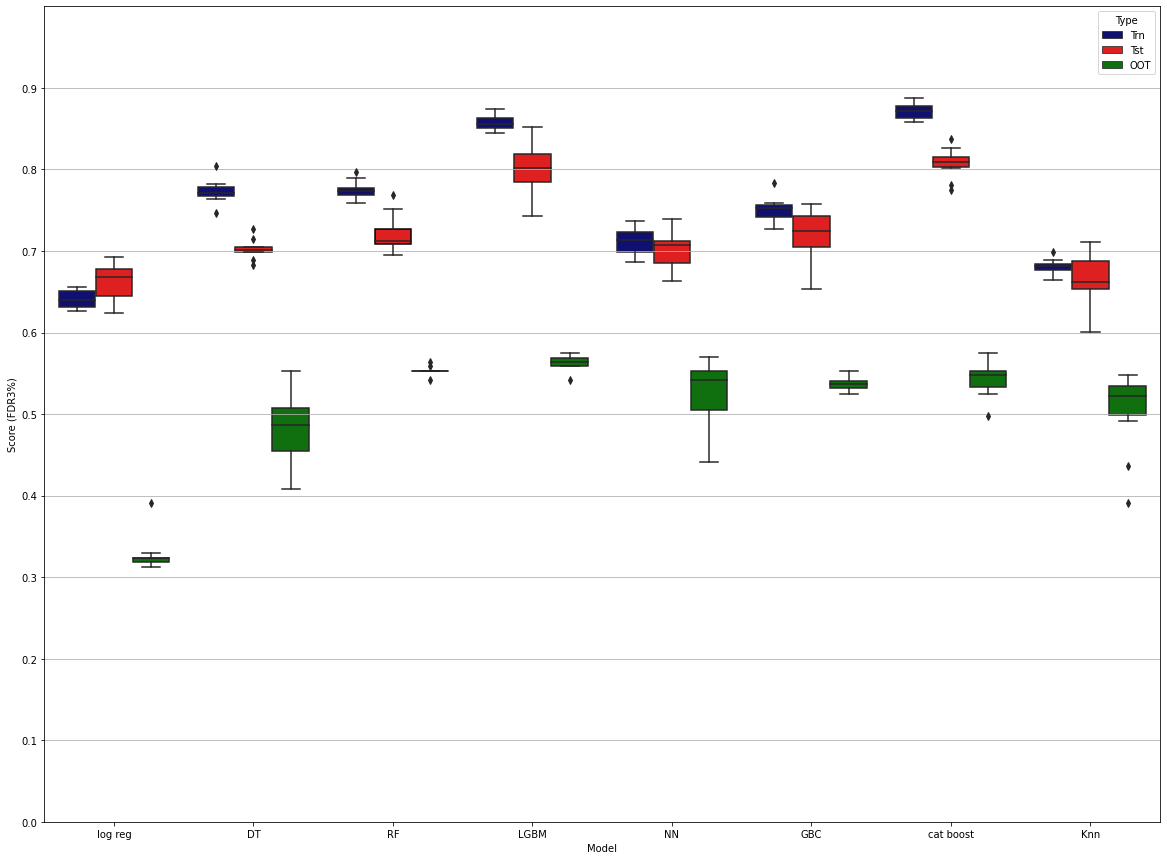

In [47]:
# ax = sns.boxplot(x='Model',y='OOT', data=df, color='navy')
ax = sns.boxplot(x='Model',y='Value',hue='Type', data=df_compare, palette=['navy','r','g'])
# Select which box you want to change    
mybox = ax.artists[model_counter-1]

# Change the appearance of that box
mybox.set_edgecolor('black')
# mybox.set_linewidth(3)
# plxlabelabel('')
plt.ylim(0,1)
plt.ylabel('Score (FDR3%)')
plt.yticks(np.arange(0,1,.1))
plt.grid(axis='y')
plt.savefig('modeling.png')
plt.show()

In [48]:
print('duration: ', datetime.now() - start_time)

duration:  0:15:43.188944


# Final model of choice

In [49]:
%%time

for niter in range(30):    
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .3)

    #final model
    model = lgb.LGBMClassifier(n_estimators = 100, max_depth = 6, num_leaves = 50, boosting_type = ‘gbdt’, learning_rate = 0.01)

    X_oot = X_oot_orig.copy()
    X_trn_save = X_trn.copy()
    Y_trn_save = Y_trn.copy()

    model.fit(X_trn, Y_trn.values.ravel())   

    predictions = model.predict_proba(X_trn_save)[:,1]
    X_trn['predicted'] = predictions
    X_trn['Fraud'] = Y_trn_save['Fraud']
    topRows = int(round(X_trn.shape[0]*0.03))
    temp = X_trn.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn.loc[:,'Fraud'])

    predictions = model.predict_proba(X_tst)[:,1]
    X_tst['predicted']=predictions
    X_tst['Fraud'] = Y_tst['Fraud']
    topRows = int(round(X_tst.shape[0]*0.03))
    temp = X_tst.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst.loc[:,'Fraud'])

    predictions = model.predict_proba(X_oot)[:,1]
    X_oot['predicted']=predictions
    X_oot['Fraud'] = Y_oot['Fraud']
    topRows = int(round(X_oot.shape[0]*0.03))
    temp = X_oot.sort_values('predicted',ascending=False).head(topRows)
    needed = temp.loc[:,'Fraud']
    FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot'])
    Modeling_output.iloc[counter] = ['LGBM',FDR3.loc[niter, 'trn'],FDR3.loc[niter, 'tst'],FDR3.loc[niter, 'oot']]
    counter = counter + 1
    if(FDR3.loc[niter, 'oot'] > .56): break
    
print(FDR3.mean())
model_counter = model_counter + 1

0 0.7339901477832512 0.7047970479704797 0.5027932960893855
1 0.7197452229299363 0.7420634920634921 0.4972067039106145
2 0.7222222222222222 0.6993006993006993 0.49162011173184356
3 0.7129186602870813 0.7430830039525692 0.4860335195530726
4 0.7310126582278481 0.7258064516129032 0.4972067039106145
5 0.7302631578947368 0.7463235294117647 0.5027932960893855
6 0.7328990228013029 0.6917293233082706 0.49162011173184356
7 0.7409733124018838 0.6995884773662552 0.4972067039106145
8 0.7287066246056783 0.7398373983739838 0.5027932960893855
9 0.7317880794701986 0.7391304347826086 0.5027932960893855
10 0.734860883797054 0.7100371747211895 0.5586592178770949
11 0.7121464226289518 0.7204301075268817 0.5027932960893855
12 0.7266666666666667 0.7428571428571429 0.4972067039106145
13 0.7459546925566343 0.6679389312977099 0.4860335195530726
14 0.7306451612903225 0.7346153846153847 0.4748603351955307
15 0.7298578199052133 0.6842105263157895 0.4972067039106145
16 0.7303370786516854 0.6731517509727627 0.491620

In [50]:
X_trn_eval = X_trn.copy()
X_tst_eval = X_tst.copy()
X_oot_eval = X_oot.copy()

In [51]:
cols = ['bin','#recs','#g','#b','%g','%b','tot','cg','cb','%cg','FDR','KS','FPR']
FDR_trn = pd.DataFrame(np.zeros((101, 13)), columns = cols)
FDR_tst = pd.DataFrame(np.zeros((101, 13)), columns = cols)
FDR_oot = pd.DataFrame(np.zeros((101, 13)), columns = cols)
trn_sorted = X_trn_eval.sort_values('predicted',ascending=False)
tst_sorted = X_tst_eval.sort_values('predicted',ascending=False)
oot_sorted = X_oot_eval.sort_values('predicted',ascending=False)
bad_tot_trn = sum(X_trn_eval.loc[:, 'Fraud'])
bad_tot_tst = sum(X_tst_eval.loc[:, 'Fraud'])
bad_tot_oot = sum(X_oot_eval.loc[:, 'Fraud'])
num_tot_trn = len(X_trn_eval)
num_tot_tst = len(X_tst_eval)
num_tot_oot = len(X_oot_eval)
good_tot_trn = num_tot_trn - bad_tot_trn
good_tot_tst = num_tot_tst - bad_tot_tst
good_tot_oot = num_tot_oot - bad_tot_oot
oot_sorted.head(20)

,card_zip3_total_7,Merchnum_max_7,card_zip_total_14,card_zip_total_60,merch_zip_max_7,Card_Merchnum_desc_total_60,zip3_total_0,card_merch_total_30,card_zip_total_30,card_merch_total_60,predicted,Fraud
90369,7.596835,3.953540,1.268944,1.043352,3.955548,1.107139,1.549789,1.208868,1.179664,1.093740,0.855447,1
89082,5.336974,2.091614,5.264274,4.639760,2.093019,4.039575,-0.359610,5.100122,5.028220,4.768855,0.754284,1
89083,5.429325,2.091614,5.355532,4.721906,2.093019,4.123618,-0.244006,5.189002,5.116125,4.852798,0.754284,1
89077,5.289437,2.091614,5.217299,4.597476,2.093019,3.996314,6.434113,5.054370,4.982970,4.725645,0.740270,1
89074,5.044844,2.091614,4.975602,4.379911,2.093019,3.880173,6.127935,4.818969,4.750152,4.503318,0.740270,1
89068,4.327532,2.091614,4.266778,3.741861,2.093019,3.227390,5.230011,4.128610,4.067368,3.851305,0.740270,1
89075,5.161815,2.091614,5.091188,4.483956,2.093019,-0.132462,6.274357,4.931544,4.861492,4.609640,0.727359,1
89120,6.575506,2.091614,6.488149,5.741435,2.093019,4.754353,1.190770,6.292115,6.207134,5.894639,0.719282,1
89128,7.085336,2.091614,6.991946,6.194929,2.093019,5.218319,1.828970,6.782789,6.692423,6.358058,0.719282,1
89121,6.972016,2.091614,6.879966,6.094131,2.093019,5.115193,1.687117,6.673726,6.584557,6.255053,0.719282,1


In [52]:
for i in range(101):
    percent_rows_trn = int(round(X_trn_eval.shape[0]*0.01*i))
    percent_rows_tst = int(round(X_tst_eval.shape[0]*0.01*i))
    percent_rows_oot = int(round(X_oot_eval.shape[0]*0.01*i))
    temp_trn = trn_sorted.head(percent_rows_trn)
    temp_tst = tst_sorted.head(percent_rows_tst)
    temp_oot = oot_sorted.head(percent_rows_oot)
    num_bad_trn = sum(temp_trn.loc[:,'Fraud'])
    num_bad_tst = sum(temp_tst.loc[:,'Fraud'])
    num_bad_oot = sum(temp_oot.loc[:,'Fraud'])
    num_tot_trn = len(temp_trn)
    num_tot_tst = len(temp_tst)
    num_tot_oot = len(temp_oot)
    num_good_trn = num_tot_trn - num_bad_trn
    num_good_tst = num_tot_tst - num_bad_tst
    num_good_oot = num_tot_oot - num_bad_oot
    
    FDR_trn.loc[i, 'bin'] = i
    FDR_trn.loc[i,'#recs'] = 0
    FDR_trn.loc[i, 'tot'] = num_tot_trn
    FDR_trn.loc[i, 'cg'] = num_good_trn
    FDR_trn.loc[i, 'cb'] = num_bad_trn
    FDR_tst.loc[i, 'bin'] = i
    FDR_tst.loc[i, 'tot'] = num_tot_tst
    FDR_tst.loc[i, 'cg'] = num_good_tst
    FDR_tst.loc[i, 'cb'] = num_bad_tst
    FDR_oot.loc[i, 'bin'] = i
    FDR_oot.loc[i, 'tot'] = num_tot_oot
    FDR_oot.loc[i, 'cg'] = num_good_oot
    FDR_oot.loc[i, 'cb'] = num_bad_oot
    if i != 0:
        FDR_trn.loc[i, '#g'] = num_good_trn - FDR_trn.loc[i-1, 'cg']
        FDR_trn.loc[i, '#b'] = num_bad_trn - FDR_trn.loc[i-1, 'cb']
        FDR_trn.loc[i,'#recs'] = FDR_trn.loc[i, '#g'] + FDR_trn.loc[i, '#b']
        FDR_trn.loc[i, '%g'] = 100* (num_good_trn - FDR_trn.loc[i-1, 'cg']) / (num_tot_trn - FDR_trn.loc[i-1, 'tot'])
        FDR_trn.loc[i, '%b'] = 100 - FDR_trn.loc[i, '%g']
        FDR_trn.loc[i, '%cg'] = 100 * num_good_trn / good_tot_trn
        FDR_trn.loc[i, 'FDR'] = 100 * num_bad_trn / bad_tot_trn
        FDR_trn.loc[i, 'KS'] = FDR_trn.loc[i, 'FDR'] - FDR_trn.loc[i, '%cg']
        FDR_trn.loc[i, 'FPR'] = num_good_trn / num_bad_trn
        FDR_tst.loc[i, '#g'] = num_good_tst - FDR_tst.loc[i-1, 'cg']
        FDR_tst.loc[i, '#b'] = num_bad_tst - FDR_tst.loc[i-1, 'cb']
        FDR_tst.loc[i,'#recs'] = FDR_tst.loc[i, '#g'] + FDR_tst.loc[i, '#b']
        FDR_tst.loc[i, '%g'] = 100* (num_good_tst - FDR_tst.loc[i-1, 'cg']) / (num_tot_tst - FDR_tst.loc[i-1, 'tot'])
        FDR_tst.loc[i, '%b'] = 100 - FDR_tst.loc[i, '%g']
        FDR_tst.loc[i, '%cg'] = 100 * num_good_tst / good_tot_tst
        FDR_tst.loc[i, 'FDR'] = 100 * num_bad_tst / bad_tot_tst
        FDR_tst.loc[i, 'KS'] = FDR_tst.loc[i, 'FDR'] - FDR_tst.loc[i, '%cg']
        FDR_tst.loc[i, 'FPR'] = num_good_tst / num_bad_tst
        FDR_oot.loc[i, '#g'] = num_good_oot - FDR_oot.loc[i-1, 'cg']
        FDR_oot.loc[i, '#b'] = num_bad_oot - FDR_oot.loc[i-1, 'cb']
        FDR_oot.loc[i,'#recs'] = FDR_oot.loc[i, '#g'] + FDR_oot.loc[i, '#b']
        FDR_oot.loc[i, '%g'] = 100* (num_good_oot - FDR_oot.loc[i-1, 'cg']) / (num_tot_oot - FDR_oot.loc[i-1, 'tot'])
        FDR_oot.loc[i, '%b'] = 100 - FDR_oot.loc[i, '%g']
        FDR_oot.loc[i, '%cg'] = 100 * num_good_oot / good_tot_oot
        FDR_oot.loc[i, 'FDR'] = 100 * num_bad_oot / bad_tot_oot
        FDR_oot.loc[i, 'KS'] = FDR_oot.loc[i, 'FDR'] - FDR_oot.loc[i, '%cg']
        FDR_oot.loc[i, 'FPR'] = num_good_oot / num_bad_oot

FDR_oot

,bin,#recs,#g,#b,%g,%b,tot,cg,cb,%cg,FDR,KS,FPR
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,1.0,121.0,72.0,49.0,59.504132,40.495868,121.0,72.0,49.0,0.604128,27.374302,26.770173,1.469388
2,2.0,121.0,93.0,28.0,76.859504,23.140496,242.0,165.0,77.0,1.384460,43.016760,41.632299,2.142857
3,3.0,121.0,111.0,10.0,91.735537,8.264463,363.0,276.0,87.0,2.315825,48.603352,46.287527,3.172414
4,4.0,121.0,116.0,5.0,95.867769,4.132231,484.0,392.0,92.0,3.289142,51.396648,48.107506,4.260870
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96.0,121.0,121.0,0.0,100.000000,0.000000,11613.0,11435.0,178.0,95.947307,99.441341,3.494034,64.241573
97,97.0,121.0,120.0,1.0,99.173554,0.826446,11734.0,11555.0,179.0,96.954187,100.000000,3.045813,64.553073
98,98.0,121.0,121.0,0.0,100.000000,0.000000,11855.0,11676.0,179.0,97.969458,100.000000,2.030542,65.229050
99,99.0,121.0,121.0,0.0,100.000000,0.000000,11976.0,11797.0,179.0,98.984729,100.000000,1.015271,65.905028


In [53]:
FDR3.to_csv('FDR3.csv')

In [54]:
FDR_trn.to_csv('FDR_trn.csv', index=False)
FDR_tst.to_csv('FDR_tst.csv', index=False)
FDR_oot.to_csv('FDR_oot.csv', index=False)

In [55]:
print("duration: ", datetime.now() - start_time)

duration:  0:15:49.088942
